## Kaggle – DataTops®
Lucas ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Lucas a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import urllib.request
import toolbox_ML
import bootcampviztools as bt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/datatops/train.csv")

## Exploración de los datos

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [38]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [39]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [40]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


In [45]:
toolbox_ML.describe_df(df)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_marca,Gpu_modelo,Gpu_tipo,Ram_in_GB,Memory_in_GB,Weight_in_kg,ScreenWidth,ScreenHeight,TotalPixels,ResolutionCategory
Tipo de Dato,int64,float64,object,float64,float64,object,object,object,object,object,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64
% Valores Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,912,19,480,6,17,36,107,9,37,93,...,3,4,2,9,13,158,12,9,14,3
% Cardinalidad,100.0,2.08,52.63,0.66,1.86,3.95,11.73,0.99,4.06,10.2,...,0.33,0.44,0.22,0.99,1.43,17.32,1.32,0.99,1.54,0.33


In [3]:
df.reset_index(drop=True)
df.index = df["laptop_ID"]
df.drop(["laptop_ID"], axis=1)

In [128]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_marca,Gpu_modelo,Gpu_tipo,Ram_in_GB,Memory_in_GB,Weight_in_kg,ScreenWidth,ScreenHeight,TotalPixels,ResolutionCategory
laptop_ID,,,,,,,,,,,,,,,,,,,,,
755,755,7.0,250 G6,3.0,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,...,1.0,1.0,1.0,8,256.0,1.86,1920,1080,2073600,0.0
618,618,4.0,Inspiron 7559,1.0,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,...,2.0,0.0,0.0,16,1024.0,2.59,1920,1080,2073600,0.0
909,909,7.0,ProBook 450,3.0,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,...,2.0,3.0,0.0,8,1024.0,2.04,1920,1080,2073600,0.0
2,2,1.0,Macbook Air,4.0,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.0,1.0,1.0,8,128.0,1.34,1440,900,1296000,1.0
286,286,4.0,Inspiron 3567,3.0,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,...,0.0,2.0,0.0,4,1024.0,2.25,1920,1080,2073600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,28,4.0,Inspiron 5570,3.0,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,...,0.0,2.0,0.0,8,256.0,2.20,1920,1080,2073600,0.0
1160,1160,7.0,Spectre Pro,0.0,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,...,1.0,1.0,1.0,8,256.0,1.48,1920,1080,2073600,0.0
78,78,10.0,IdeaPad 320-15IKBN,3.0,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,...,1.0,1.0,1.0,8,2048.0,2.20,1920,1080,2073600,0.0


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [5]:
import pandas as pd
import re
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [6]:

# Transformación de la columna Cpu
def extract_cpu_features(cpu_string):
    # Extraer marca (Intel, AMD, etc.)
    if 'Intel' in cpu_string:
        marca = 'Intel'
    elif 'AMD' in cpu_string:
        marca = 'AMD'
    else:
        marca = 'Desconocido'
    
    # Extraer modelo (i3, i5, i7, etc.)
    modelo_match = re.search(r'(i\d|Ryzen \d)', cpu_string)
    modelo = modelo_match.group(1) if modelo_match else 'Desconocido'
    
    # Extraer generación (número después de modelo)
    geneneracion_match = re.search(r'\d{4}', cpu_string)
    geneneracion = int(geneneracion_match.group(0)) if geneneracion_match else 0
    
    # Extraer frecuencia (GHz)
    frequencia_match = re.search(r'(\d\.\d+)GHz', cpu_string)
    frequencia = float(frequencia_match.group(1)) if frequencia_match else 0.0
    
    return pd.Series([marca, modelo, geneneracion, frequencia])

In [7]:
df[['Cpu_marca', 'Cpu_modelo', 'Cpu_generacion', 'Cpu_frecuencia']] = df['Cpu'].apply(extract_cpu_features)

In [8]:

# Transformación de la columna Gpu
def extract_gpu_features(gpu_string):
    # Extraer marca (Nvidia, AMD, Intel)
    if 'Nvidia' in gpu_string:
        marca = 'Nvidia'
    elif 'AMD' in gpu_string:
        marca = 'AMD'
    elif 'Intel' in gpu_string:
        marca = 'Intel'
    else:
        marca = 'Other'
    
    # Extraer el modelo (GTX, Radeon, HD Graphics, etc.)
    modelo_match = re.search(r'(GTX|Radeon|HD Graphics)', gpu_string)
    modelo = modelo_match.group(1) if modelo_match else 'Unknown'
    
    # Tipo de GPU (Integrada o Dedicada)
    if 'HD Graphics' in gpu_string or marca == 'Intel':
        gpu_tipo = 'Integrated'
    else:
        gpu_tipo = 'Dedicated'
    
    return pd.Series([marca, modelo, gpu_tipo])

In [9]:
df[['Gpu_marca', 'Gpu_modelo', 'Gpu_tipo']] = df['Gpu'].apply(extract_gpu_features)

In [10]:
# ---- Función para extraer el valor numérico de la RAM usando regex ----
def extract_ram_size(ram_string):
    # Usamos una expresión regular para encontrar el número de GB
    match = re.search(r'(\d+)', ram_string)
    if match:
        return int(match.group(1))  # Retorna el valor en entero (GB)
    else:
        return 0  # Valor predeterminado si no se encuentra el formato esperad

In [11]:
df['Ram_in_GB'] = df['Ram'].apply(extract_ram_size)

In [12]:
# ---- Función para extraer la capacidad de memoria en GB utilizando regex ----
def extract_memory_size(memory_string):
    # Usamos una expresión regular para encontrar el valor numérico seguido de GB o TB
    match = re.search(r'(\d+\.?\d*)\s*(GB|TB)', memory_string)
    if match:
        size = float(match.group(1))  # Convertimos el tamaño a número (flotante por si es TB con decimales)
        unit = match.group(2)  # Extraemos la unidad (GB o TB)
        
        # Convertimos todo a GB (si es TB, multiplicamos por 1024)
        if unit == 'TB':
            return size * 1024  # Convertir TB a GB
        else:
            return size  # Si es GB, dejamos el número como está
    else:
        return 0  # Valor predeterminado si no se encuentra el formato esperado



In [13]:
# Aplicar la función a la columna 'Memory'
df['Memory_in_GB'] = df['Memory'].apply(extract_memory_size)

In [14]:
# Transformación de la columna 'ScreenResolution'
def extract_screen_resolution(resolution):
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        ancho = int(match.group(1))
        largo = int(match.group(2))
        pixeles_totales = ancho * largo
        return pd.Series([ancho, largo, pixeles_totales])
    else:
        return pd.Series([0, 0, 0])

#Clasificación de la resolución
def classify_resolution(pixeles_totales):
    if pixeles_totales < 1_000_000:  # Menos de 1M píxeles
        return 'Low'
    elif pixeles_totales < 2_000_000:  # Entre 1M y 2M píxeles
        return 'Medium'
    elif pixeles_totales < 4_000_000:  # Entre 2M y 4M píxeles
        return 'High'
    else:  # 4M píxeles o más
        return 'Ultra'


In [15]:
# ---- Función para extraer el valor de peso en kilogramos utilizando regex ----
def extract_weight(weight_string):
    # Usamos una expresión regular para encontrar el valor numérico seguido de 'kg'
    match = re.search(r'(\d+\.?\d*)\s*kg', weight_string)
    if match:
        return float(match.group(1))  # Convertimos el tamaño a número flotante (para manejar decimales)
    else:
        return 0  # Valor predeterminado si no se encuentra el formato esperado



In [16]:
# Aplicar la función a la columna 'Weight'
df['Weight_in_kg'] = df['Weight'].apply(extract_weight)

In [17]:

df[['ScreenWidth', 'ScreenHeight', 'TotalPixels']] = df['ScreenResolution'].apply(extract_screen_resolution)
df['ResolutionCategory'] = df['TotalPixels'].apply(classify_resolution)

In [20]:
categorical_columns = ["Company",'TypeName', 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',"ResolutionCategory"]
ordinal_encoder = OrdinalEncoder()
# Aplicar el OrdinalEncoder a cada Columna
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

In [21]:
numeric_columns = ['Inches', 'Ram_in_GB', 'Memory_in_GB', 'Weight_in_kg', 'Cpu_generacion', 'Cpu_frecuencia']
features = categorical_columns +  numeric_columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   laptop_ID           912 non-null    int64  
 1   Company             912 non-null    float64
 2   Product             912 non-null    object 
 3   TypeName            912 non-null    float64
 4   Inches              912 non-null    float64
 5   ScreenResolution    912 non-null    object 
 6   Cpu                 912 non-null    object 
 7   Ram                 912 non-null    object 
 8   Memory              912 non-null    object 
 9   Gpu                 912 non-null    object 
 10  OpSys               912 non-null    float64
 11  Weight              912 non-null    object 
 12  Price_in_euros      912 non-null    float64
 13  Cpu_marca           912 non-null    object 
 14  Cpu_modelo          912 non-null    float64
 15  Cpu_generacion      912 non-null    int64  
 16  Cpu_frecuen

## Modelado

### 1. Definir X e y

In [23]:
X = df[features]
y = df['Price_in_euros'].copy()
X.shape

(912, 14)

In [24]:
X.shape

(912, 14)

In [25]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [28]:
y_train

laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### EDA ###
Numericas

In [30]:
target = 'Price_in_euros'
train_set = X_train
train_set[target]= y_train


corr = train_set.corr(numeric_only= True)
corr[target]

Company               0.143089
TypeName             -0.180040
OpSys                 0.266028
Cpu_modelo            0.571688
Gpu_marca             0.332542
Gpu_modelo           -0.193866
Gpu_tipo             -0.179333
ResolutionCategory   -0.118098
Inches                0.051334
Ram_in_GB             0.744269
Memory_in_GB         -0.124536
Weight_in_kg          0.202341
Cpu_generacion        0.137956
Cpu_frecuencia        0.428509
Price_in_euros        1.000000
Name: Price_in_euros, dtype: float64

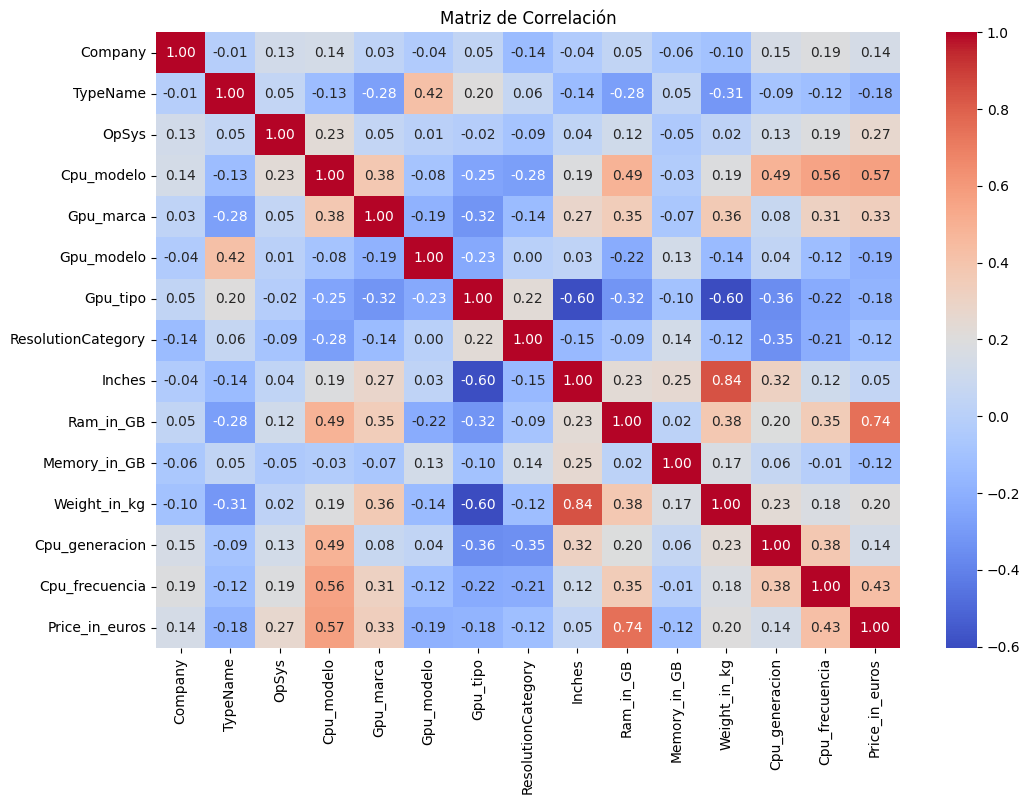

In [31]:
# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [32]:
from scipy.stats import f_oneway

# ANOVA para cada variable categórica
for col in categorical_columns:
    groups = [group[target].values for name, group in df.groupby(col)]
    stat, p_value = f_oneway(*groups)
    print(f'ANOVA para {col}: estadístico={stat}, p-value={p_value}')

ANOVA para Company: estadístico=9.860402612124021, p-value=1.870590724382312e-25
ANOVA para TypeName: estadístico=122.37875417094632, p-value=5.614483898089411e-99
ANOVA para OpSys: estadístico=14.276591764156391, p-value=1.0281069131390438e-19
ANOVA para Cpu_modelo: estadístico=157.2810335309913, p-value=3.175348003572107e-102
ANOVA para Gpu_marca: estadístico=59.961491112138596, p-value=3.4615571131552154e-25
ANOVA para Gpu_modelo: estadístico=58.503127249769385, p-value=1.3978607640445022e-34
ANOVA para Gpu_tipo: estadístico=28.06529212595857, p-value=1.4718210206982048e-07
ANOVA para ResolutionCategory: estadístico=203.02957270620934, p-value=1.2783580130379357e-73


In [33]:
featues_num_clf_disc = ["Ram_in_GB","Memory_in_GB" ,"Cpu_generacion","Cpu_frecuencia","Inches"]
features_num_clf = ["Weight_in_kg"]

In [34]:
# ANOVA para cada variable discreta
for col in featues_num_clf_disc:
    groups = [group[target].values for name, group in df.groupby(col)]
    stat, p_value = f_oneway(*groups)
    print(f'ANOVA para {col}: estadístico={stat}, p-value={p_value}')

ANOVA para Ram_in_GB: estadístico=164.76976248995922, p-value=1.0619499522668467e-170
ANOVA para Memory_in_GB: estadístico=38.26127502994953, p-value=2.0439703230201215e-72
ANOVA para Cpu_generacion: estadístico=23.222964858888922, p-value=1.4421435666981701e-133
ANOVA para Cpu_frecuencia: estadístico=27.737460979675983, p-value=5.061471347275784e-91
ANOVA para Inches: estadístico=18.312462108496227, p-value=4.037452656606655e-45


In [35]:
categorical_columns = ["Company",'TypeName', 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',"ResolutionCategory"]
categorical_columns_1 = [ 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',]
featues_num_clf_disc = ["Ram_in_GB","Memory_in_GB" ,"Cpu_generacion","Cpu_frecuencia"]
featues_num_clf_disc_2 = ["Ram_in_GB","Memory_in_GB" ,"Cpu_generacion","Cpu_frecuencia","Inches"]
features_num_clf = ["Weight_in_kg"]

In [36]:
features= categorical_columns+features_num_clf+featues_num_clf_disc

### 3. Baseline de modelos


La regresión lineal es un modelo simple que sirve como una excelente línea de base. Es fácil de interpretar y rápida de entrenar. Este modelo asume una relación lineal entre las variables predictoras (features) y el target (precio).

In [37]:
# Instanciar y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train[features], y_train)

# Predecir y calcular RMSE
y_pred_lr = lr.predict(X_test[features])
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE Regresión Lineal: {rmse_lr:.3f}')

RMSE Regresión Lineal: 443.701


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

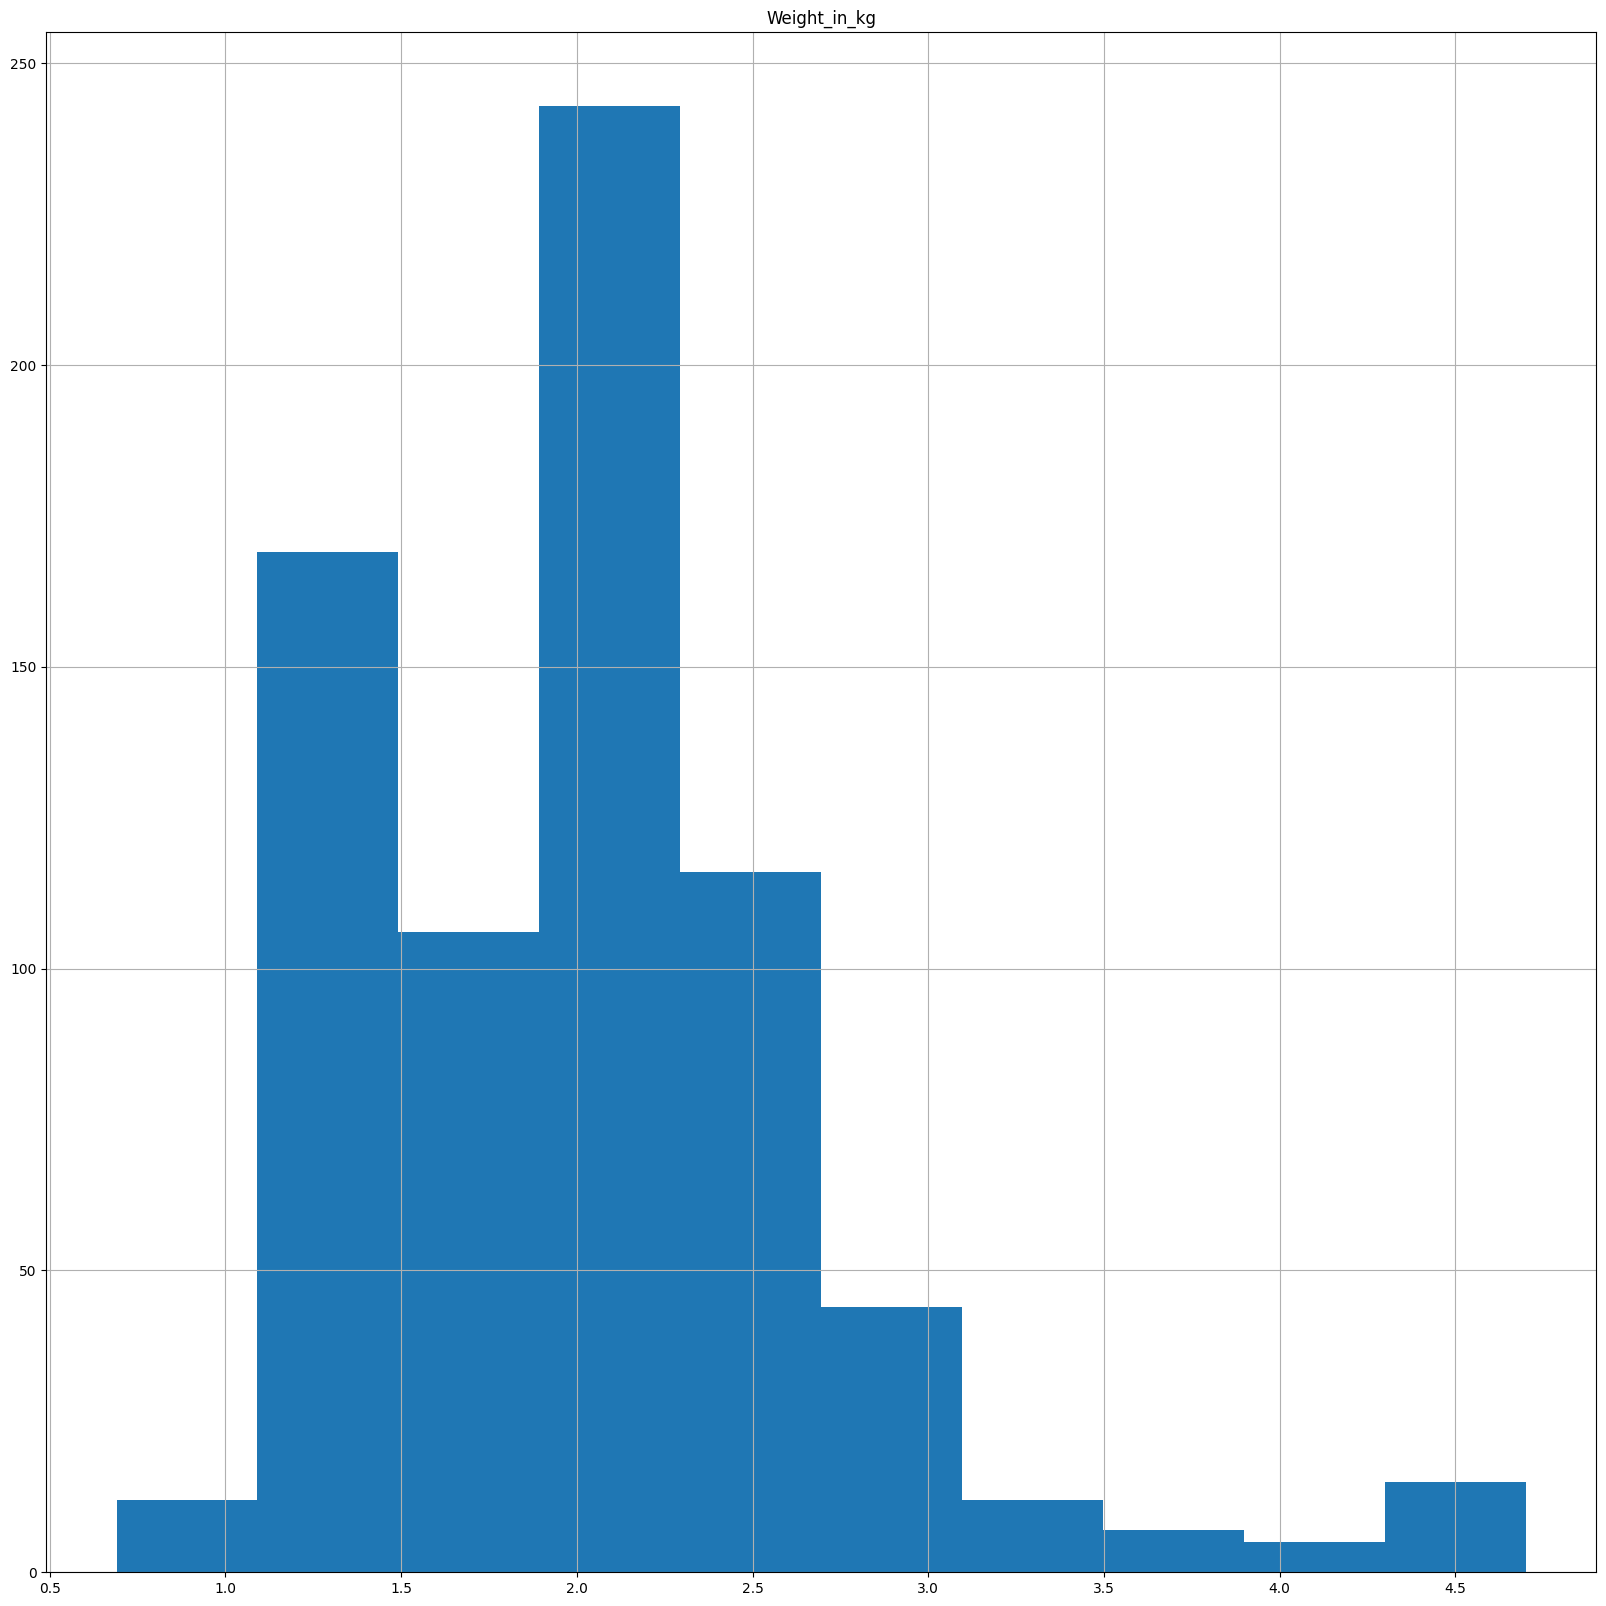

In [38]:
train_set[features_num_clf].hist(figsize = (20,20))
plt.tight_layout

In [39]:
features_to_transform = ["Weight_in_kg"]

In [40]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [41]:
scaler = StandardScaler()
X_train_scaled[features] = scaler.fit_transform(X_train_scaled[features])
X_test_scaled[features] = scaler.transform(X_test_scaled[features])

for col in features_to_transform:
    desplaza = 0 
    if X_train_scaled[col].min() <= 0:
        desplaza = int(abs(X_train_scaled[col].min())) + 1
    X_train_scaled[col] = np.log(X_train_scaled[col] + desplaza)
    X_test_scaled[col] = np.log(X_test_scaled[col] + desplaza)


In [42]:
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [43]:
# Instanciar y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled[features], y_train)

# Predecir y calcular RMSE
y_pred_lr = lr.predict(X_test_scaled[features])
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE Regresión Lineal: {rmse_lr:.3f}')

RMSE Regresión Lineal: 440.590


In [44]:
from sklearn.linear_model import Ridge

# Instanciar y entrenar el modelo Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha
ridge.fit(X_train_scaled[features], y_train)

# Predecir y evaluar el modelo
y_pred_ridge = ridge.predict(X_test_scaled[features])
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'RMSE Regresión Ridge: {rmse_ridge:.3f}')

RMSE Regresión Ridge: 440.571


In [45]:
# Instanciar y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled[features], y_train)

# Predecir y calcular RMSE
y_pred_rf = rf.predict(X_test_scaled[features])
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE Random Forest: {rmse_rf:.3f}')

RMSE Random Forest: 380.116


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [46]:
from sklearn.model_selection import GridSearchCV, KFold

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 210, 240, 250],  # Número de árboles
    'max_depth': [10, 20, 30, None],            # Profundidad máxima
    'min_samples_split': [2, 5, 10],            # Mínimas muestras para dividir
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]                   # Si se utiliza bootstrap
}
# Crear el modelo
rf = RandomForestRegressor(random_state=42)



# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', 
                           cv=5, verbose=2, n_jobs=-1)

# Ajustar el Grid Search
grid_search.fit(X_train_scaled[features], y_train)

# Obtener los mejores hiperparámetros
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")

# Predecir y evaluar el modelo optimizado
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled[features])
rmse_optimized_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Random Forest optimizado: {rmse_optimized_rf:.3f}')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s


In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled[features])
X_test_poly = poly.transform(X_test_scaled[features])

# Instanciar y entrenar el modelo de regresión lineal
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predecir
y_pred_poly = lr_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f'RMSE Regresión Polinómica: {rmse_poly:.3f}')

RMSE Regresión Polinómica: 357.852


In [74]:
from sklearn.pipeline import make_pipeline
# Definir el modelo de Ridge (puedes cambiarlo a Lasso o LinearRegression si no quieres regularización)
ridge = Ridge()

# Definir los parámetros para GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5],  # Grados polinómicos a probar
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Valores de regularización para Ridge
}

# Crear pipeline: primero transforma con PolynomialFeatures, luego ajusta con Ridge
pipeline = make_pipeline(PolynomialFeatures(), ridge)

# Definir GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Usamos MSE negativo
                           cv=5,  # Validación cruzada con 5 folds
                           n_jobs=-1,  # Utiliza todos los núcleos disponibles
                           verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train_scaled[features], y_train)

# Obtener el mejor conjunto de hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predecir en el conjunto de prueba con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_poly = best_model.predict(X_test_scaled[features])

# Calcular el RMSE
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f'RMSE Regresión Polinómica con Hiperparámetros Optimizados: {rmse_poly:.3f}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....polynomialfeatures__degree=2, ridge__alpha=0.01; total time=   0.0s
[CV] END ....polynomialfeatures__degree=2, ridge__alpha=0.01; total time=   0.0s
[CV] END ....polynomialfeatures__degree=2, ridge__alpha=0.01; total time=   0.0s
[CV] END ....polynomialfeatures__degree=2, ridge__alpha=0.01; total time=   0.0s
[CV] END .....polynomialfeatures__degree=2, ridge__alpha=0.1; total time=   0.0s
[CV] END .....polynomialfeatures__degree=2, ridge__alpha=0.1; total time=   0.0s
[CV] END .....polynomialfeatures__degree=2, ridge__alpha=0.1; total time=   0.0s
[CV] END .....polynomialfeatures__degree=2, ridge__alpha=0.1; total time=   0.0s
[CV] END ....polynomialfeatures__degree=2, ridge__alpha=0.01; total time=   0.0s
[CV] END .......polynomialfeatures__degree=2, ridge__alpha=1; total time=   0.0s
[CV] END .......polynomialfeatures__degree=2, ridge__alpha=1; total time=   0.0s
[CV] END .......polynomialfeatures__degree=2, r

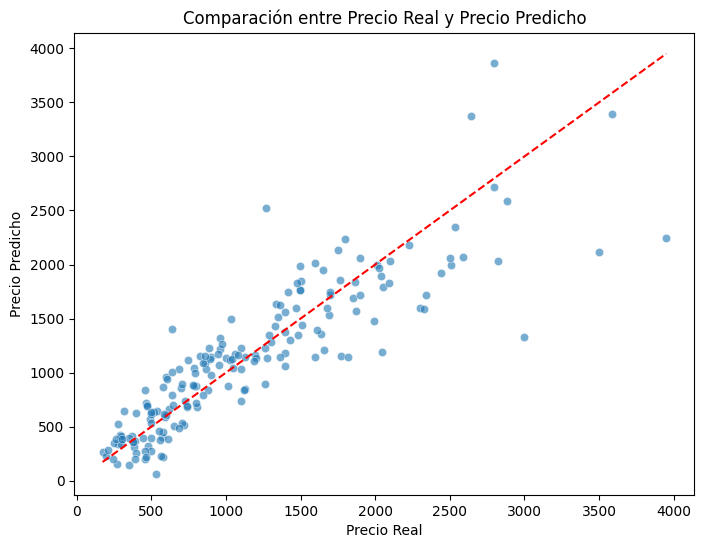

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Comparación entre Precio Real y Precio Predicho')
plt.show()

In [102]:
y_test

laptop_ID
451     1099.00
802      959.00
723      857.07
682      699.00
1306     369.00
         ...   
369      639.00
626      379.00
416      304.45
546      859.00
260      949.00
Name: Price_in_euros, Length: 183, dtype: float64

In [50]:
# Crear un DataFrame para comparar los valores reales y los predichos
comparacion = pd.DataFrame({'Precio Real': y_test, 'Precio Predicho': y_pred_poly})

# Mostrar las primeras filas de la comparación
print(comparacion.head(10))  # Mostrar las primeras 10 filas

           Precio Real  Precio Predicho
laptop_ID                              
451            1099.00      1229.909078
802             959.00      1321.481930
723             857.07      1089.052710
682             699.00       862.216719
1306            369.00       414.613695
437             269.00       153.820204
22              999.00      1131.675387
322             459.90       202.822751
357            1304.00      1283.219113
174            1349.00      1518.228768


-----------------------------------------------------------------

In [51]:
def entrenar_modelos_por_rango(df, features, target_col):
    """
    Entrena modelos de regresión lineal, random forest y polinómico en diferentes rangos de precios.

    Args:
    df (pd.DataFrame): DataFrame con los datos.
    features (list): Lista de nombres de columnas para las características.
    target_col (str): Nombre de la columna objetivo.

    Returns:
    dict: Resultados de RMSE y parámetros óptimos.
    """
    # Dividir los datos en tres rangos de precios
    rango1 = df[df[target_col] <= 1500]  # Rango de 0 a 1500
    rango2 = df[(df[target_col] > 1500) & (df[target_col] <= 2500)]  # Rango de 1500 a 2500
    rango3 = df[df[target_col] > 2500]  # Rango mayor de 2500

    resultados = {}

    for i, rango in enumerate([rango1, rango2, rango3], start=1):
        print(f"\nEntrenando modelos para el rango {i}:")
        
        if rango.empty:
            print("No hay datos en este rango.")
            continue

        # Separar variables predictoras (X) y objetivo (y)
        X = rango[features]
        y = rango[target_col]

        # Escalar los datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Modelo 1: Regresión Lineal
        lin_reg = LinearRegression()
        lin_reg.fit(X_scaled, y)
        y_pred_lin = lin_reg.predict(X_scaled)
        rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))

        # Modelo 2: Optimización de Random Forest con GridSearchCV
        param_grid_rf = {
        'n_estimators': [100, 200, 210, 240, 250],  # Número de árboles
        'max_depth': [10, 20, 30, None],            # Profundidad máxima
        'min_samples_split': [2, 5, 10],            # Mínimas muestras para dividir
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]                   # Si se utiliza bootstrap
        }

        rf = RandomForestRegressor(random_state=42)
        grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search_rf.fit(X_scaled, y)

        # Obtener las mejores predicciones
        y_pred_rf = grid_search_rf.predict(X_scaled)
        rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
        
        print(f'Mejores parámetros de Random Forest: {grid_search_rf.best_params_}')

        # Modelo 3: Regresión Polinómica
        for degree in [2, 3]:  # Puedes ajustar el rango según lo que necesites
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_scaled)
            
            lin_reg_poly = LinearRegression()
            lin_reg_poly.fit(X_poly, y)
            y_pred_poly = lin_reg_poly.predict(X_poly)
            rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
            print(f'RMSE para polinomio de grado {degree}: {rmse_poly:.3f}')

        # Guardar resultados para cada rango
        resultados[i] = {
            'rmse_lineal': rmse_lin,
            'rmse_random_forest': rmse_rf,
            'best_params_random_forest': grid_search_rf.best_params_,
            'rmse_polinomial': {'2': rmse_poly}
        }
        print(f'RMSE Lineal: {rmse_lin:.3f}')
        print(f'RMSE Random Forest: {rmse_rf:.3f}')

    return resultados

In [52]:
entrenar_modelos_por_rango(X_train_scaled,features, target)


Entrenando modelos para el rango 1:
Mejores parámetros de Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
RMSE para polinomio de grado 2: 134.266
RMSE para polinomio de grado 3: 60.165
RMSE Lineal: 187.341
RMSE Random Forest: 79.658

Entrenando modelos para el rango 2:
Mejores parámetros de Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 210}
RMSE para polinomio de grado 2: 374.516
RMSE para polinomio de grado 3: 93.681
RMSE Lineal: 238.873
RMSE Random Forest: 184.948

Entrenando modelos para el rango 3:
Mejores parámetros de Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
RMSE para polinomio de grado 2: 0.000
RMSE para polinomio de grado 3: 0.000
RMSE Lineal: 378.645
RMSE Random Forest: 656.135


{1: {'rmse_lineal': 187.34067624593857,
  'rmse_random_forest': 79.65769256115993,
  'best_params_random_forest': {'bootstrap': True,
   'max_depth': 10,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 250},
  'rmse_polinomial': {'2': 60.16522319786019}},
 2: {'rmse_lineal': 238.8731696016987,
  'rmse_random_forest': 184.94835564317233,
  'best_params_random_forest': {'bootstrap': True,
   'max_depth': 10,
   'min_samples_leaf': 4,
   'min_samples_split': 10,
   'n_estimators': 210},
  'rmse_polinomial': {'2': 93.68084996174274}},
 3: {'rmse_lineal': 378.6450088496881,
  'rmse_random_forest': 656.1353207811459,
  'best_params_random_forest': {'bootstrap': True,
   'max_depth': 10,
   'min_samples_leaf': 4,
   'min_samples_split': 2,
   'n_estimators': 100},
  'rmse_polinomial': {'2': 1.4018836391974281e-11}}}

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [112]:
X_pred = pd.read_csv("./data/datatops/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [113]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [114]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [115]:
X_pred.head(5)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [120]:
X_pred.reset_index(drop=True)
X_pred.index = X_pred["laptop_ID"]
X_pred.drop(["laptop_ID"], axis=1, inplace=True)

In [121]:
X_pred

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg
...,...,...,...,...,...,...,...,...,...,...,...
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg


In [122]:



X_pred[['ScreenWidth', 'ScreenHeight', 'TotalPixels']] = X_pred['ScreenResolution'].apply(extract_screen_resolution)
X_pred['ResolutionCategory'] = X_pred['TotalPixels'].apply(classify_resolution)
X_pred['Weight_in_kg'] = X_pred['Weight'].apply(extract_weight)
X_pred['Memory_in_GB'] = X_pred['Memory'].apply(extract_memory_size)
X_pred['Ram_in_GB'] = X_pred['Ram'].apply(extract_ram_size)
X_pred[['Gpu_marca', 'Gpu_modelo', 'Gpu_tipo']] = X_pred['Gpu'].apply(extract_gpu_features)
X_pred[['Cpu_marca', 'Cpu_modelo', 'Cpu_generacion', 'Cpu_frecuencia']] = X_pred['Cpu'].apply(extract_cpu_features)


categorical_columns = ["Company",'TypeName', 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',"ResolutionCategory"]
ordinal_encoder = OrdinalEncoder()
# Aplicar el OrdinalEncoder a cada Columna
X_pred[categorical_columns] = ordinal_encoder.fit_transform(X_pred[categorical_columns])


categorical_columns = ["Company",'TypeName', 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',"ResolutionCategory"]
categorical_columns_1 = [ 'OpSys', 'Cpu_modelo', 'Gpu_marca', 'Gpu_modelo', 'Gpu_tipo',]
featues_num_clf_disc = ["Ram_in_GB","Memory_in_GB" ,"Cpu_generacion","Cpu_frecuencia"]
featues_num_clf_disc_2 = ["Ram_in_GB","Memory_in_GB" ,"Cpu_generacion","Cpu_frecuencia","Inches"]
features_num_clf = ["Weight_in_kg"]

X_pred_scaled = X_pred.copy()

scaler = StandardScaler()
X_pred_scaled[features] = scaler.fit_transform(X_pred_scaled[features])


for col in features_to_transform:
    desplaza = 0 
    if X_pred_scaled[col].min() <= 0:
        desplaza = int(abs(X_pred_scaled[col].min())) + 1
    X_pred_scaled[col] = np.log(X_pred_scaled[col] + desplaza)




In [123]:
y_pred = best_rf.predict(X_pred[features])

In [124]:
predictions_submit = best_rf.predict(X_pred[features])
predictions_submit

array([4464.92075   , 4068.20255   , 4572.9955    , 4463.6146    ,
       4458.1096    , 4488.5129    , 4466.7502    , 4080.6801    ,
       4477.11575   , 4431.7261    , 4464.92075   , 4649.88495   ,
       3824.10975   , 4464.92075   , 4589.8348    , 4435.15835   ,
       4477.11575   , 4630.8885    , 4696.08837262, 4458.1096    ,
       4464.92075   , 4593.22141429, 4606.19755   , 4763.41824167,
       4589.35825   , 4477.11575   , 3868.75405   , 4476.31225   ,
       4464.92075   , 4986.8804    , 4464.92075   , 3465.43448333,
       4606.19755   , 4464.92075   , 4673.6022    , 4464.92075   ,
       4589.35825   , 4362.24825   , 4477.11575   , 4598.3063    ,
       4606.19755   , 3862.98175   , 4352.9421    , 4986.8804    ,
       4477.11575   , 4464.92075   , 4477.11575   , 4589.35825   ,
       4477.11575   , 4356.96835   , 4445.6125    , 4080.6801    ,
       4464.92075   , 4589.35825   , 4738.92273333, 4655.03899762,
       4458.1096    , 4477.11575   , 4452.8643    , 4352.9421 

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

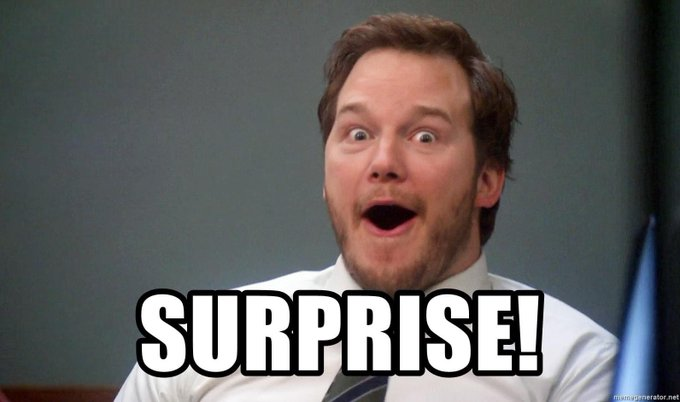

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [93]:
sample = pd.read_csv("data/datatops/sample_submission.csv")

In [94]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [95]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [125]:
#¿Cómo creamos la submission?
submission = pd.DataFrame(predictions_submit)

In [129]:
X_pred[target] = predictions_submit

In [130]:
X_pred

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Memory_in_GB,Ram_in_GB,Gpu_marca,Gpu_modelo,Gpu_tipo,Cpu_marca,Cpu_modelo,Cpu_generacion,Cpu_frecuencia,Price_in_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
209,9.0,Legion Y520-15IKBN,1.0,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,3.0,...,512.0,16,2.0,0.0,0.0,Intel,4.0,7700,2.8,4464.92075
1281,0.0,Aspire ES1-531,3.0,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,1.0,...,500.0,4,1.0,1.0,1.0,Intel,0.0,3060,1.6,4068.20255
1168,9.0,V110-15ISK (i3-6006U/4GB/1TB/No,3.0,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,3.0,...,1024.0,4,1.0,1.0,1.0,Intel,2.0,6006,2.0,4572.99550
1231,4.0,Inspiron 7579,0.0,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,4.0,...,256.0,8,1.0,1.0,1.0,Intel,3.0,7200,2.5,4463.61460
1020,7.0,ProBook 640,3.0,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,4.0,...,256.0,4,1.0,1.0,1.0,Intel,3.0,7200,2.5,4458.10960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,10.0,GE72MVR 7RG,1.0,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,4.0,...,512.0,16,2.0,0.0,0.0,Intel,4.0,7700,2.8,4464.92075
948,15.0,Tecra Z40-C-12X,3.0,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,4.0,...,128.0,4,1.0,1.0,1.0,Intel,3.0,6200,2.3,4786.64500
483,4.0,Precision M5520,5.0,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,4.0,...,256.0,8,2.0,3.0,0.0,Intel,4.0,7700,2.8,4448.10750


In [126]:
submission = pd.DataFrame({'Precio Predicho': predictions_submit})

In [127]:
submission.head()

,Precio Predicho
0,4464.92075
1,4068.20255
2,4572.99550
3,4463.61460
4,4458.10960


In [28]:
submission.shape

(391, 2)

In [101]:
sample.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [99]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Lucas: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [100]:
chequeador(submission)

Check the number of rows and/or columns and try again

Mensaje secreto de Iván y Lucas: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.
